Reinforcement learning algorithm for solving mazes
====

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from ExtremeLearningMachine import EnsembleELM

In [2]:
# Define a maze
maze = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],    
        [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],    
        [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],    
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
Bound = maze.shape[0]

# Define start and goal
S = [1 , 1]
G = [Bound - 2, Bound - 2]

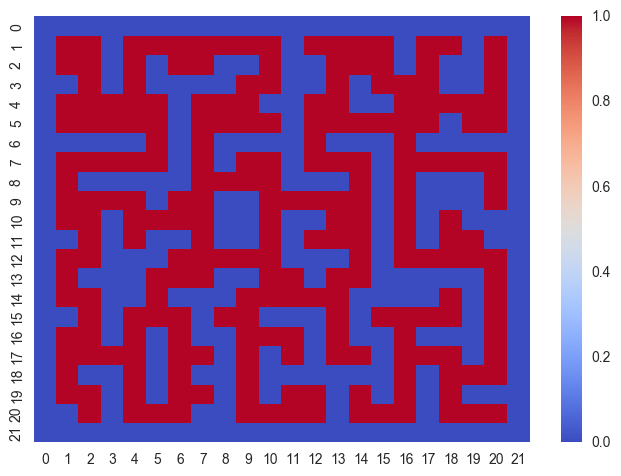

In [3]:
# show the maze
seaborn.heatmap(maze, cmap="coolwarm");

# epsilon-greedy TD algorithm

In [4]:
alpha = 0.7 # learning rate
epsilon = 0.8
gamma = 0.95
loop = 200

# Initialize the value function
V = np.ones((Bound, Bound))

# The reward difinition
r_func = lambda agent: 100 if all(agent == np.array(G)) else 0

# The learning curve
learning_count = []

for i in range(loop):
    # Initialize the location of the agent
    agent = np.array(S)
    
    # Initialize the counter
    count = 0
    
    while True:
        # Choice an action
        xy_choice = [agent + np.array([x,y]) for (x,y) in [(1,0),(0,1),(-1,0),(0,-1)] if maze[tuple(agent + np.array([x,y]))] == 1]
        if np.random.random() > epsilon:
            choice = np.array([r_func(xy) + gamma * V[tuple(xy)] for xy in xy_choice])
            new_agent = xy_choice[np.argmax(choice)]
        else:
            new_agent = xy_choice[np.random.randint(len(xy_choice))]
        
        r = r_func(new_agent)
        
        # Update the value function
        V[tuple(agent)] += alpha * (r + gamma * V[tuple(new_agent)] - V[tuple(agent)])

        # End loop
        if all(agent == np.array(G)):
            break

        # Update agent
        agent = new_agent
        
        # Update counter
        count += 1
    
    if i % (loop/10) == 0:
        print("The agent took %s times to reach at the goal." % str(count))
    learning_count.append(count)

The agent took 3998 times to reach at the goal.
The agent took 494 times to reach at the goal.
The agent took 592 times to reach at the goal.
The agent took 524 times to reach at the goal.
The agent took 308 times to reach at the goal.
The agent took 706 times to reach at the goal.
The agent took 450 times to reach at the goal.
The agent took 458 times to reach at the goal.
The agent took 536 times to reach at the goal.
The agent took 414 times to reach at the goal.


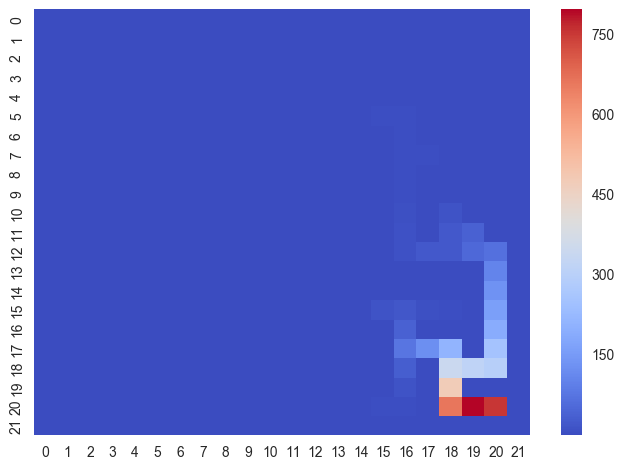

In [5]:
# plotting
seaborn.heatmap(V, cmap="coolwarm");

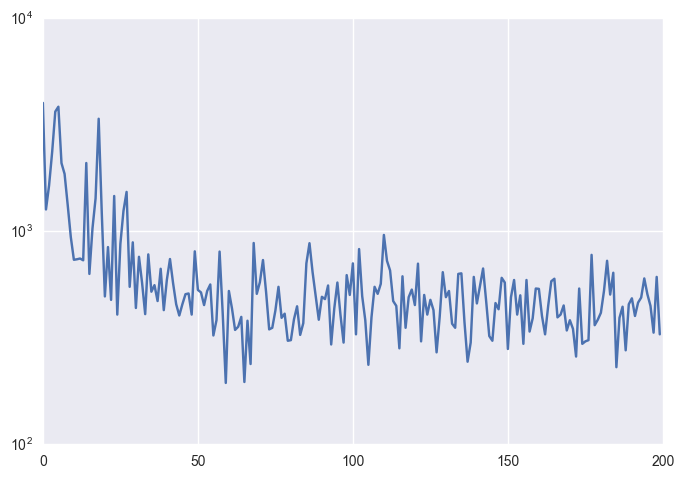

In [6]:
plt.semilogy(learning_count)
plt.show()

# Q-ExtremeLearningMachine algorithm

In [ ]:
epsilon = 0.8
gamma = 0.95
n_units = 300
ensemble = 50 # like the learning rate
loop = 200

# Initialize the value function
V = np.ones((Bound, Bound))

# The reward difinition
r_func = lambda xy: 100 if all(xy == np.array(G)) else 0

# The learning curve
learning_count = []

# Initialize ensembleELM
ensembleELM = EnsembleELM(ensemble, n_units)

for i in range(loop):
    # Initialize the location of the agent
    agent = np.array(S)
    
    # Initialize the counter
    count = 0
    
    while True:
        # Choice an action
        xy_choice = [agent + np.array([x,y]) for (x,y) in [(1,0),(0,1),(-1,0),(0,-1)] if maze[tuple(agent + np.array([x,y]))] == 1]
        X = np.array([[*agent] for xy in xy_choice])
        y = np.array([[r_func(xy) + gamma * V[tuple(xy)]] for xy in xy_choice])
        if np.random.random() > epsilon:
            for elm in ensembleELM.elm:
                elm.fit(X, y)
            new_agent = xy_choice[np.argmax(elm.transform(X))]
        else:
            new_agent = xy_choice[np.random.randint(len(xy_choice))]

        # Update the value function
        V[tuple(agent)] += alpha * (r_func(new_agent) + gamma * V[tuple(new_agent)] - V[tuple(agent)])

        # End loop
        if all(agent == np.array(G)):
            break

        # Update agent
        agent = new_agent

        # Update counter
        count += 1
    
    if i % (loop/10) == 0:
        print("The agent took %s times to reach at the goal." % str(count))
    learning_count.append(count)

In [ ]:
# plotting
seaborn.heatmap(V, cmap="coolwarm");

In [ ]:
plt.semilogy(learning_count)
plt.show()